In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
#os.getcwd()

#Importando os datasets do meu local
df_red = pd.read_csv('/home/roratto/study/facul/DS_Unesp/P1/dataset/winequality-red.csv', sep=';')
df_white = pd.read_csv('/home/roratto/study/facul/DS_Unesp/P1/dataset/winequality-white.csv', sep=';')

# Remover colunas que não são úteis para nossa análise
df_red.drop(columns=['free sulfur dioxide', 'total sulfur dioxide', 'chlorides', 'sulphates'], inplace=True)
df_white.drop(columns=['free sulfur dioxide', 'total sulfur dioxide', 'chlorides', 'sulphates'], inplace=True)

# Remover duplicatas se existirem
df_red = df_red.drop_duplicates()
df_white = df_white.drop_duplicates()

In [2]:
# Verifica se há missing values
print(df_white.isnull().sum().sort_values(ascending=False))
print(df_red.isnull().sum().sort_values(ascending=False))

fixed acidity       0
volatile acidity    0
citric acid         0
residual sugar      0
density             0
pH                  0
alcohol             0
quality             0
dtype: int64
fixed acidity       0
volatile acidity    0
citric acid         0
residual sugar      0
density             0
pH                  0
alcohol             0
quality             0
dtype: int64


In [3]:
#Após analisar os dados, vi que alguns valores de alcool estão com mais casas decimais do que o esperado
#Então, arredondei os valores para 2 casas decimais
df_red['alcohol'] = df_red['alcohol'].round(2)
df_white['alcohol'] = df_white['alcohol'].round(2)

## Análise exploratória

Criei uma matriz de correlação utilizando a bilioteca pandas, para correlacionar os datasets de vinho tinto e branco e visualizar essas correlações usando um heatmap, e me ajudar na análise exploratória 

ps: havia visto um video antes sobre essa matriz de correlação em python, por isso resolvi usar :)

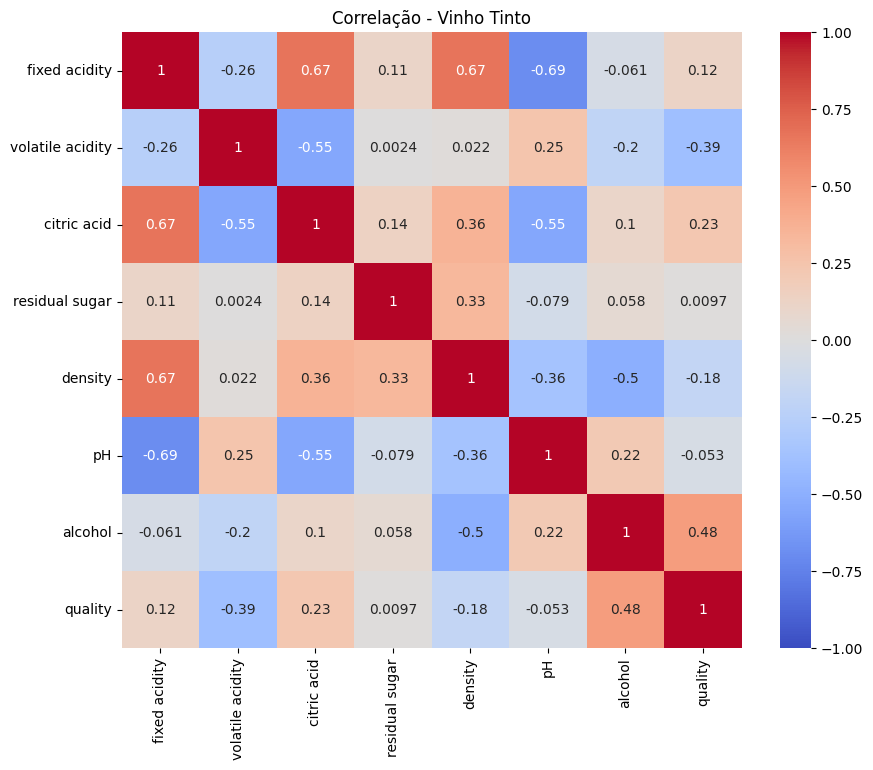

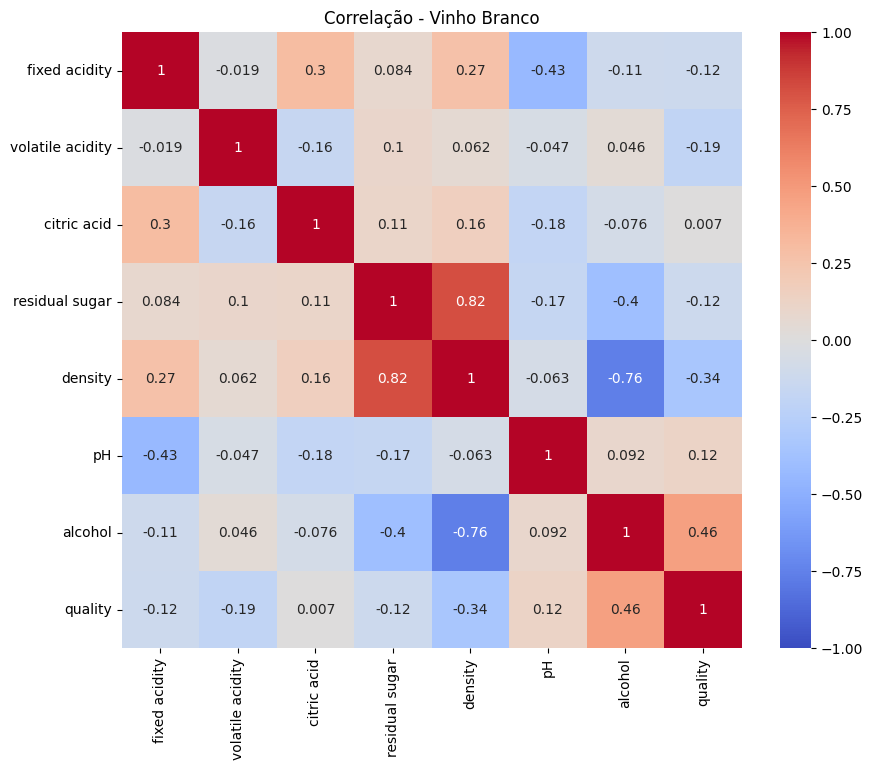

In [4]:
corr_red = df_red.corr()
corr_white = df_white.corr()

# Gráfico de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr_red, annot=True, cmap='coolwarm',  vmin=-1, vmax=1)
plt.title('Correlação - Vinho Tinto')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_white, annot=True, cmap='coolwarm',  vmin=-1, vmax=1)
plt.title('Correlação - Vinho Branco')
plt.show()

### Primeiras análises

Vendo essa matriz, deu para perceber uma relação interessante entre o tanto de álcool que o vinho possui e a qualidade apontada. Assim posso pressupor então que geralmente quanto mais bebado a pessoa fica, melhor o vinho kkkkkkk. 

Em contra partida, a menor correlação da qualidade é com a densidade, me dizendo que poderia pressupor que quanto mais denso o vinho, menos qualidoso e também menos alcoólico (maior no vinho branco).

Brincadeiras a parte, vamos começar a análise exploratória.

In [5]:
#Retornei a quantidade de cada vinhos de acordo com a qualidade
print(df_red['quality'].value_counts().sort_index())
print(df_white['quality'].value_counts().sort_index())

quality
3     10
4     53
5    576
6    535
7    166
8     17
Name: count, dtype: int64
quality
3      20
4     153
5    1174
6    1784
7     688
8     131
9       5
Name: count, dtype: int64


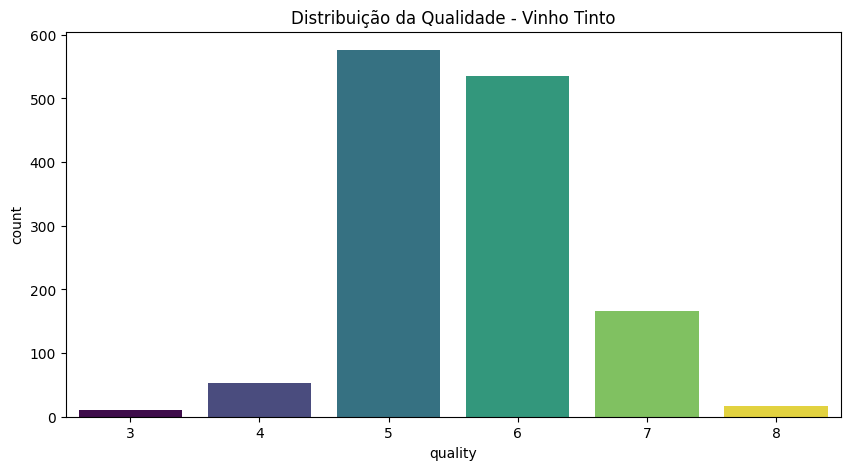

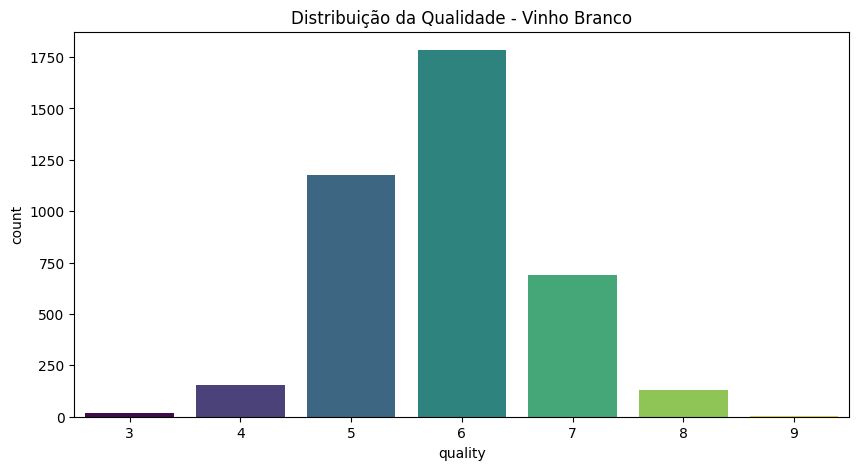

Vinho Tinto
quality
3     10
4     53
5    576
6    535
7    166
8     17
Name: count, dtype: int64
Vinho Branco
quality
3      20
4     153
5    1174
6    1784
7     688
8     131
9       5
Name: count, dtype: int64

Média das notas de qualidade do vinho tinto
5.62
Média das notas de qualidade do vinho branco
5.85


In [6]:
# Distribuição da qualidade dos vinhos
plt.figure(figsize=(10, 5))
sns.countplot(x='quality', hue='quality', data=df_red, palette='viridis', legend=False)
plt.title('Distribuição da Qualidade - Vinho Tinto')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='quality', hue='quality', data=df_white, palette='viridis', legend=False)
plt.title('Distribuição da Qualidade - Vinho Branco')
plt.show()

# Valores totais de cada dataset para cada qualidade
print('Vinho Tinto')
print(df_red['quality'].value_counts().sort_index())
print('Vinho Branco')
print(df_white['quality'].value_counts().sort_index())

# Média das somas das qualidades para cada dataset
print('\nMédia das notas de qualidade do vinho tinto')
print((df_red['quality'].mean()).round(2))
print('Média das notas de qualidade do vinho branco')
print((df_white['quality'].mean()).round(2))


## Resumo da primeira análise baseada em qualidade

### Vinho branco
De acordo com os gráficos das distribuições de qualidade, podemos perceber que os vinhos brancos tem uma tendência a terem maiores notas de qualidade, tendo até alguns classificados com 9 pontos de qualidade, para ele há uma grande predominâcia de notas 6 

Assim como sua média de notas é maior.

### Vinho tinto
Em contra partida, o vinho tinto não tem nenhuma nota acima de 8, há uma grande predominâcia de notas 5 e tem menos dados.

## Suposições
Podemos pressupor que se a análise fosse para vendas, se fosse o caso, talvez compensase investir mais em vinhos brancos do que vermelhos, por terem mais registros e melhores notas no geral.


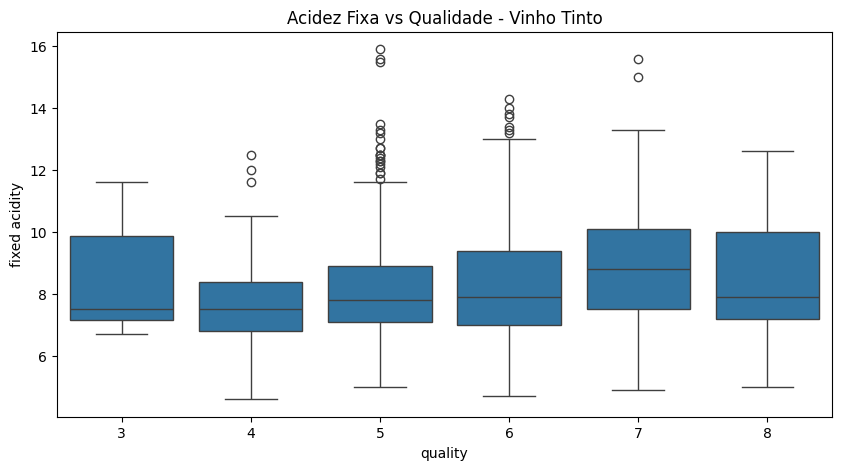

In [7]:
# Comparação entre variáveis vinho tinto
plt.figure(figsize=(10, 5))
sns.boxplot(x='quality', y='fixed acidity', data=df_red)
plt.title('Acidez Fixa vs Qualidade - Vinho Tinto')
plt.show()

## Vinho Tinto

1. Distribuição da Acidez Fixa:

- A acidez fixa varia entre diferentes níveis de qualidade.
- A mediana da acidez fixa tende a ser ligeiramente mais alta para vinhos de qualidade inferior (3-5) e diminui para vinhos de qualidade superior (6-8).

2. Dispersão dos Dados:

- A dispersão da acidez fixa é maior para vinhos de qualidade inferior, indicando maior variabilidade.
- Para vinhos de qualidade superior, a dispersão é menor, sugerindo que vinhos de alta qualidade têm uma acidez fixa mais consistente.

### Resumindo:
- Vinhos tintos com a acidez fixa com menor disperção tende a ser melhor e a 
- A acidez fixa tende a ser maior em vinhos de qualidade inferior, e vai dimuninuindo a medida que a qualidade aumenta

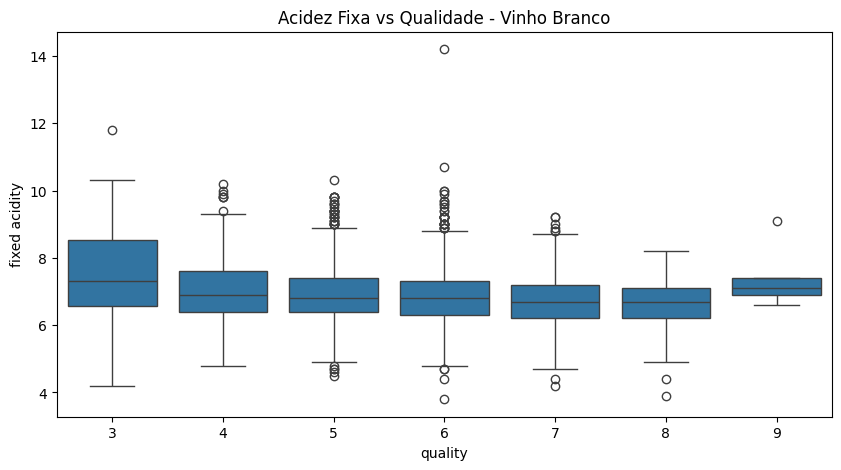

In [8]:
# Comparação entre variáveis vinho branco
plt.figure(figsize=(10, 5))
sns.boxplot(x='quality', y='fixed acidity', data=df_white)
plt.title('Acidez Fixa vs Qualidade - Vinho Branco')
plt.show()

## Vinho branco

1. Distribuição da Acidez Fixa:

- A acidez fixa também varia entre diferentes níveis de qualidade.
- A mediana da acidez fixa é relativamente constante para vinhos de qualidade média (5-6) e ligeiramente mais alta para vinhos de qualidade inferior (3-4) e superior (7-9).

2. Dispersão dos Dados:

- A dispersão da acidez fixa é maior para vinhos de qualidade inferior e superior, indicando maior variabilidade.
- Para vinhos de qualidade média, a dispersão é menor, sugerindo que vinhos de qualidade média têm uma acidez fixa mais consistente.

### Resumindo

- A variabilidade de acidez fixa é maior en vinhos de qualidade inferior 
- A acidez fixa é mais contante para vinhos de qualidade média.

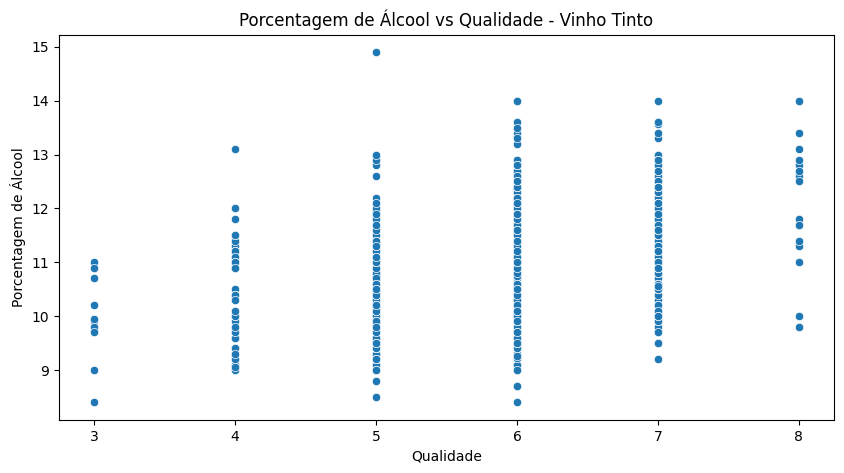

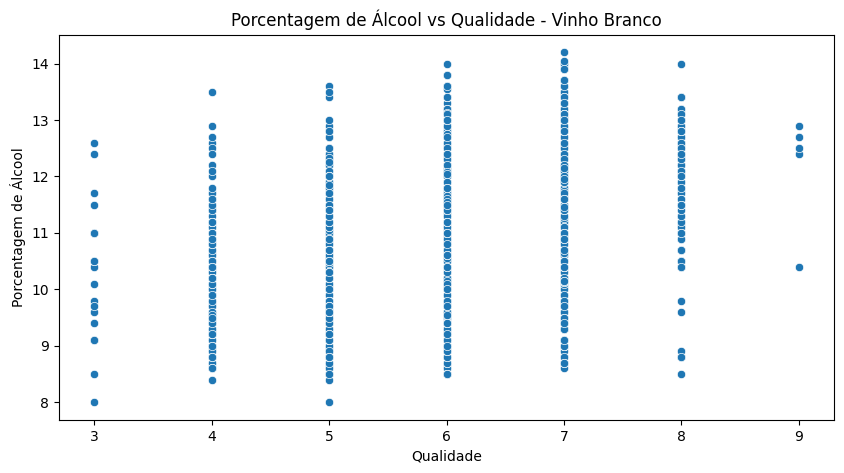

In [9]:
# Comparação entre qualidade e porcentagem de álcool - Vinho Tinto
plt.figure(figsize=(10, 5))
sns.scatterplot(x='quality', y='alcohol', data=df_red)
plt.title('Porcentagem de Álcool vs Qualidade - Vinho Tinto')
plt.xlabel('Qualidade')
plt.ylabel('Porcentagem de Álcool')
plt.show()

# Comparação entre qualidade e porcentagem de álcool - Vinho Branco
plt.figure(figsize=(10, 5))
sns.scatterplot(x='quality', y='alcohol', data=df_white)
plt.title('Porcentagem de Álcool vs Qualidade - Vinho Branco')
plt.xlabel('Qualidade')
plt.ylabel('Porcentagem de Álcool')
plt.show()

### Vinho Tinto:

- A porcentagem de álcool tende a ser mais baixa em vinhos de qualidade inferior e aumenta à medida que a qualidade melhora.
- Existe uma tendência positiva entre a qualidade e a porcentagem de álcool.

### Vinho Branco:

- A porcentagem de álcool tende a ser mais baixa em vinhos de qualidade inferior e aumenta à medida que a qualidade melhora.
- Existe uma tendência positiva entre a qualidade e a porcentagem de álcool.

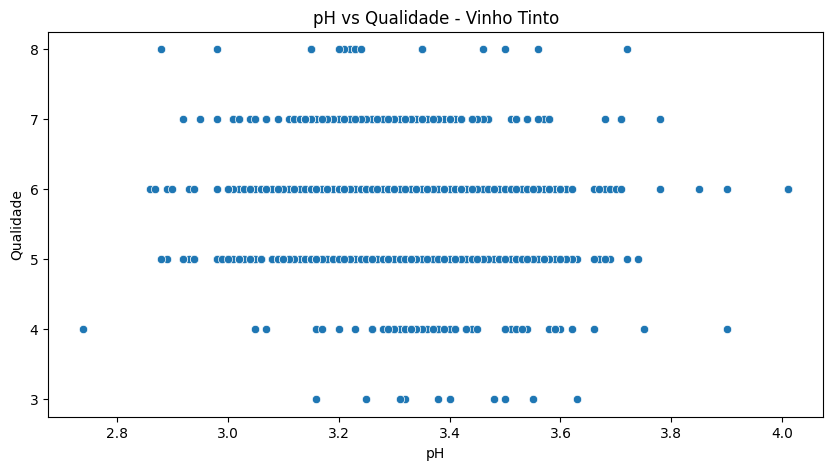

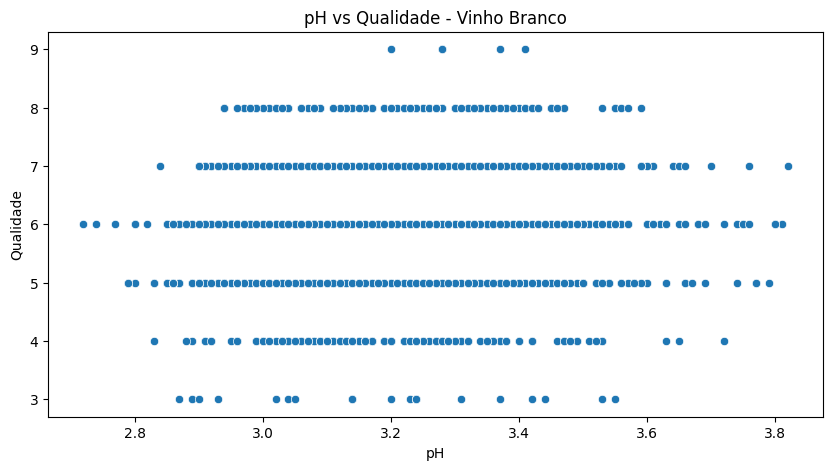

Correlação entre pH e qualidade - Vinho Tinto: -0.05
Correlação entre pH e qualidade - Vinho Branco: 0.12


In [10]:
# Comparação entre qualidade e pH - Vinho Tinto
plt.figure(figsize=(10, 5))
sns.scatterplot(x='pH', y='quality', data=df_red)
plt.title('pH vs Qualidade - Vinho Tinto')
plt.xlabel('pH')
plt.ylabel('Qualidade')
plt.show()

# Comparação entre qualidade e pH - Vinho Branco
plt.figure(figsize=(10, 5))
sns.scatterplot(x='pH', y='quality', data=df_white)
plt.title('pH vs Qualidade - Vinho Branco')
plt.xlabel('pH')
plt.ylabel('Qualidade')
plt.show()

# Calcular a correlação entre pH e qualidade
corr_red = df_red['pH'].corr(df_red['quality'])
corr_white = df_white['pH'].corr(df_white['quality'])

print(f'Correlação entre pH e qualidade - Vinho Tinto: {corr_red:.2f}')
print(f'Correlação entre pH e qualidade - Vinho Branco: {corr_white:.2f}')

## Conclusão dessa análise baseada no PH

### Vinho Tinto:

- A correlação entre pH e qualidade é calculada. Se o valor for negativo, isso indica que vinhos com pH mais baixo tendem a ter uma qualidade melhor.
- A análise visual do gráfico de dispersão pode mostrar uma leve tendência de vinhos com pH mais baixo terem uma qualidade melhor.

### Vinho Branco:

- A correlação entre pH e qualidade é calculada. Se o valor for negativo, isso indica que vinhos com pH mais baixo tendem a ter uma qualidade melhor.
- A análise visual do gráfico de dispersão pode mostrar uma leve tendência de vinhos com pH mais baixo terem uma qualidade melhor.

Porém, após fazer essas análises, se basear no PH para decidir qualidade não faz muito sentido, uma vez que depende muito e não há certa linearidade.
